In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

In [9]:
# Data Exploration
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [11]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [13]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Text(0.5, 1.0, 'Age Distribution by Heart Disease')

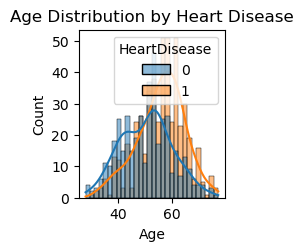

In [17]:
# Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, bins=30)
plt.title('Age Distribution by Heart Disease')

Text(0.5, 1.0, 'Cholesterol Distribution by Heart Disease')

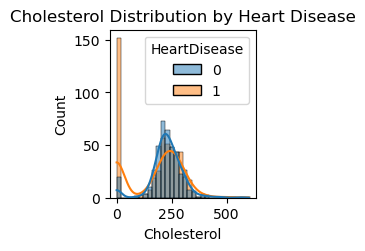

In [19]:
# Cholesterol Distribution
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease', kde=True, bins=30)
plt.title('Cholesterol Distribution by Heart Disease')

Text(0.5, 1.0, 'Resting BP Distribution by Heart Disease')

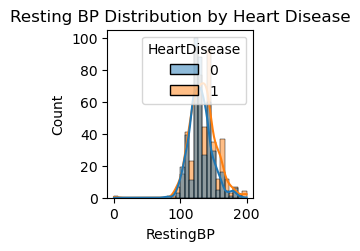

In [21]:
# RestingBP Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='RestingBP', hue='HeartDisease', kde=True, bins=30)
plt.title('Resting BP Distribution by Heart Disease')

Text(0.5, 1.0, 'Max HR Distribution by Heart Disease')

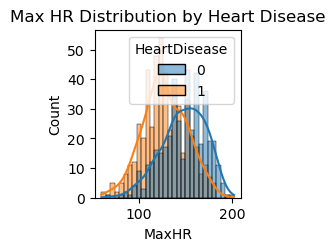

In [23]:
# MaxHR Distribution
plt.subplot(2, 3, 4)
sns.histplot(data=df, x='MaxHR', hue='HeartDisease', kde=True, bins=30)
plt.title('Max HR Distribution by Heart Disease')

Text(0.5, 1.0, 'Oldpeak Distribution by Heart Disease')

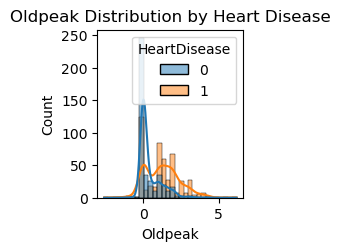

In [25]:
# Oldpeak Distribution
plt.subplot(2, 3, 5)
sns.histplot(data=df, x='Oldpeak', hue='HeartDisease', kde=True, bins=30)
plt.title('Oldpeak Distribution by Heart Disease')

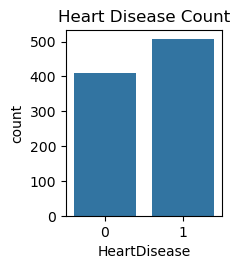

In [27]:
# Heart Disease Count
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='HeartDisease')
plt.title('Heart Disease Count')

plt.tight_layout()
plt.show()

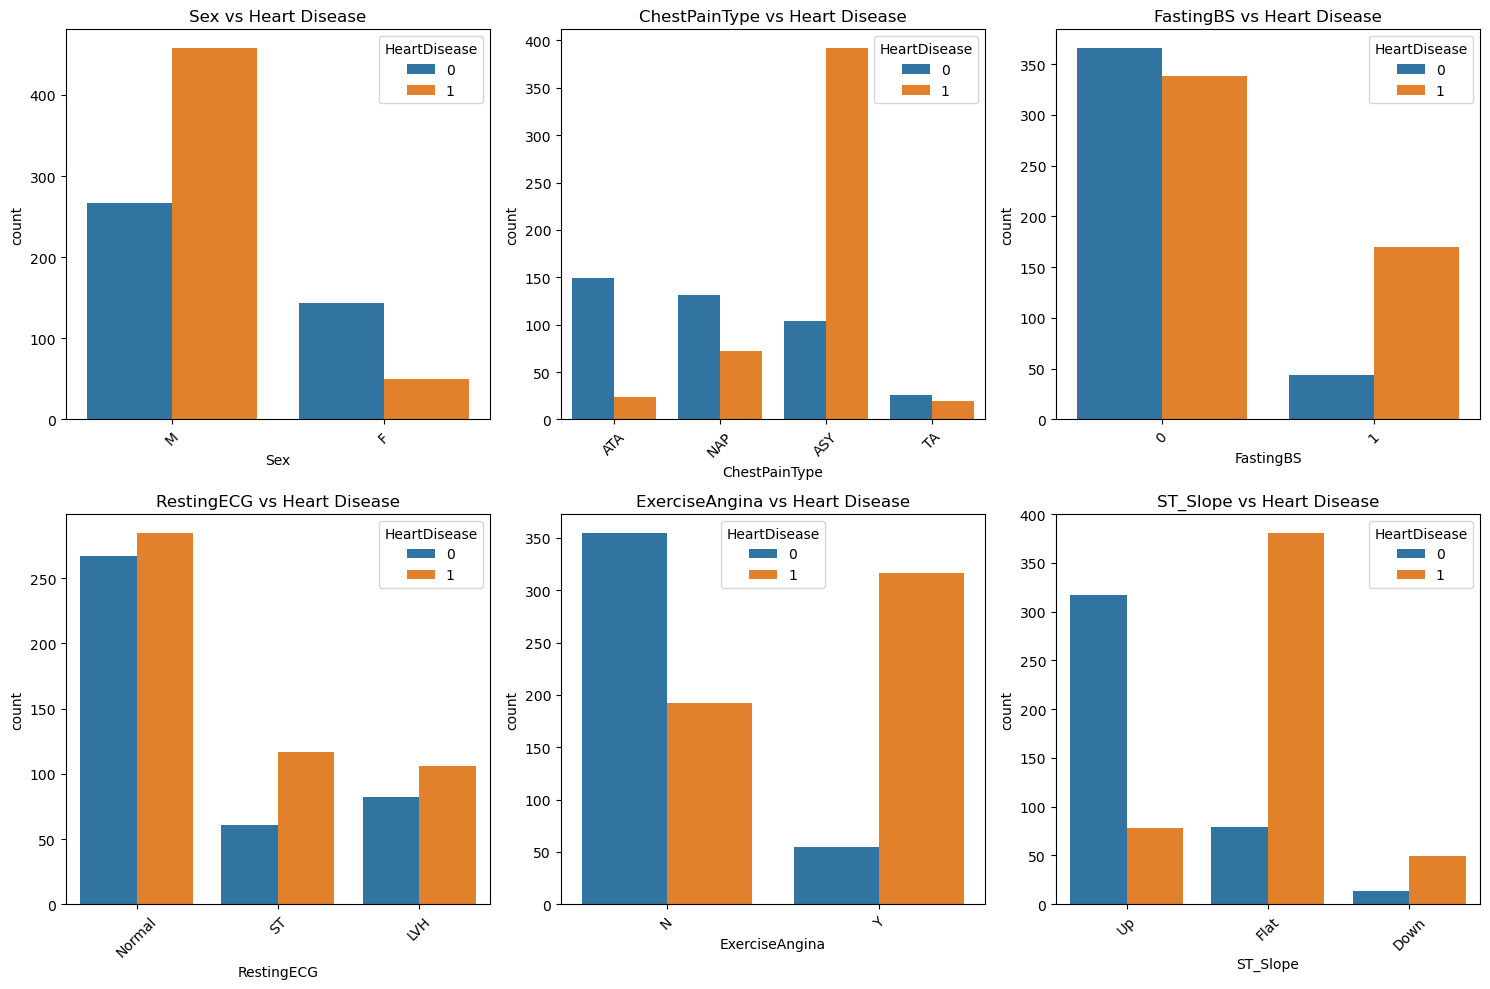

In [29]:
# Categorical Features Analysis
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='HeartDisease')
    plt.title(f'{col} vs Heart Disease')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Data Preprocessing
# Encode categorical variables
label_encoders = {}
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [33]:
# Feature Selection
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


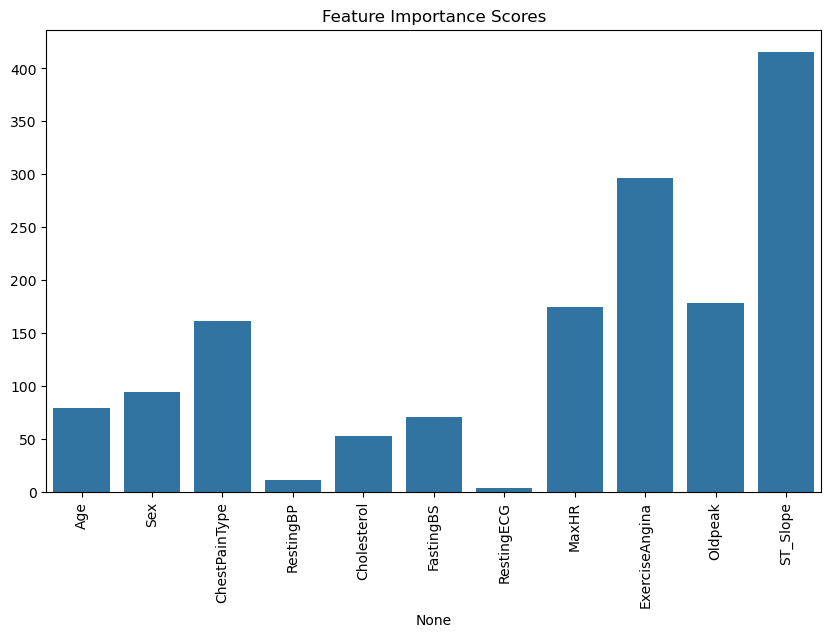

In [35]:
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=selector.scores_)
plt.title('Feature Importance Scores')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Scale numerical features
scaler = StandardScaler()
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [41]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Model Evaluation
y_pred = model.predict(X_test)

In [45]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


Confusion Matrix:
[[66 11]
 [11 96]]

Accuracy Score: 0.8804347826086957


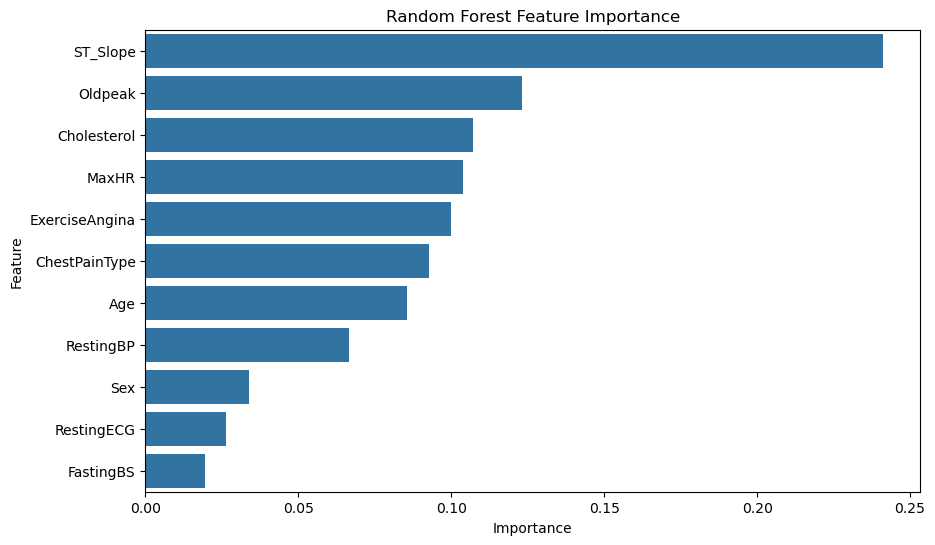

In [47]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Random Forest Feature Importance')
plt.show()